In [26]:
import cv2
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
from skimage.feature import hog
import random

In [3]:
img = cv2.imread('./data/images/train/german shepherd/1.jpg', cv2.IMREAD_GRAYSCALE) / 255.0

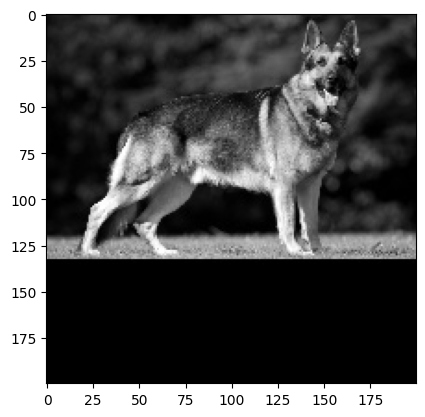

In [4]:
plt.imshow(img, cmap='gray')

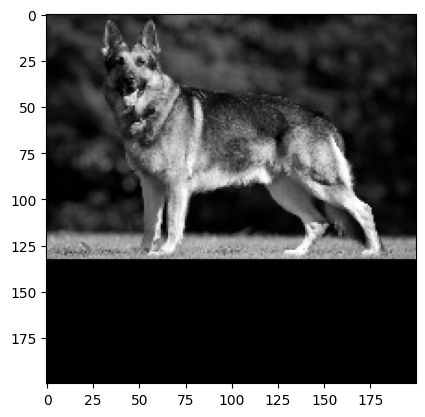

In [5]:
flipped_img = cv2.flip(img, 1)
plt.imshow(flipped_img, cmap='gray')

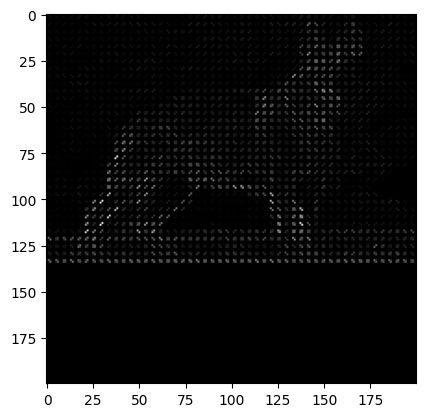

In [6]:
fd, hog_img = hog(img, orientations=18, pixels_per_cell=(4, 4),
               cells_per_block=(2, 2), visualize=True)
plt.imshow(hog_img, cmap='gray')

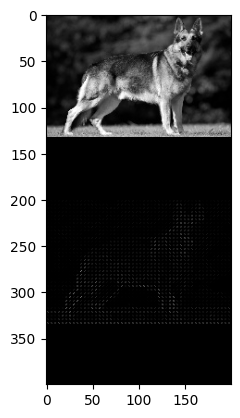

In [6]:
stacked_img = np.vstack((img, hog_img))
plt.imshow(stacked_img, cmap='gray')

In [27]:
def create_dataset(usage):

    breeds_dict = {}
    data = []

    PATH = f'./data/images/{usage}'
    breed_idx = 0

    for breed in os.listdir(PATH):
        print(f'Processing breed: {breed}... ', end='')
        breeds_dict[breed] = breed_idx
        breed_idx += 1
        breed_path = os.path.join(PATH, breed)
        for image in os.listdir(breed_path):
            image_path = os.path.join(breed_path, image)
            img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            img = img.reshape(-1, 1)
            data.append([img, breed_idx])
        print('Done!')

    random.shuffle(data)

    X = []
    y = []

    for img, label in data:
        X.append(img)
        y.append(label)

    X = np.array(X)
    y = np.array(y)

    return breeds_dict, X, y

In [28]:
breeds_dict, X_train, y_train = create_dataset('train')

Processing breed: affenpinscher... Done!
Processing breed: airedale terrier... Done!
Processing breed: american pit bull terrier... Done!
Processing breed: beagle... Done!
Processing breed: bedlington terrier... Done!
Processing breed: bichon frise... Done!
Processing breed: black russian terrier... Done!
Processing breed: border collie... Done!
Processing breed: borzoi... Done!
Processing breed: boston terrier... Done!
Processing breed: bulldog... Done!
Processing breed: bullmastiff... Done!
Processing breed: chihuahua... Done!
Processing breed: chow chow... Done!
Processing breed: dachshund... Done!
Processing breed: dalmatian... Done!
Processing breed: doberman... Done!
Processing breed: french bulldog... Done!
Processing breed: german shepherd... Done!
Processing breed: golden retriever... Done!
Processing breed: labrador retriever... Done!
Processing breed: pembroke welsh corgi... Done!
Processing breed: pomeranian... Done!
Processing breed: poodle... Done!
Processing breed: rottw

In [29]:
breeds_dict

{'affenpinscher': 0,
 'airedale terrier': 1,
 'american pit bull terrier': 2,
 'beagle': 3,
 'bedlington terrier': 4,
 'bichon frise': 5,
 'black russian terrier': 6,
 'border collie': 7,
 'borzoi': 8,
 'boston terrier': 9,
 'bulldog': 10,
 'bullmastiff': 11,
 'chihuahua': 12,
 'chow chow': 13,
 'dachshund': 14,
 'dalmatian': 15,
 'doberman': 16,
 'french bulldog': 17,
 'german shepherd': 18,
 'golden retriever': 19,
 'labrador retriever': 20,
 'pembroke welsh corgi': 21,
 'pomeranian': 22,
 'poodle': 23,
 'rottweiler': 24,
 'samoyed dog': 25,
 'sheltie dog': 26,
 'shiba inu': 27,
 'siberian husky': 28,
 'yorkshire terrier': 29}

In [30]:
_, X_test, y_test = create_dataset('test')

Processing breed: affenpinscher... Done!
Processing breed: airedale terrier... Done!
Processing breed: american pit bull terrier... Done!
Processing breed: beagle... Done!
Processing breed: bedlington terrier... Done!
Processing breed: bichon frise... Done!
Processing breed: black russian terrier... Done!
Processing breed: border collie... Done!
Processing breed: borzoi... Done!
Processing breed: boston terrier... Done!
Processing breed: bulldog... Done!
Processing breed: bullmastiff... Done!
Processing breed: chihuahua... Done!
Processing breed: chow chow... Done!
Processing breed: dachshund... Done!
Processing breed: dalmatian... Done!
Processing breed: doberman... Done!
Processing breed: french bulldog... Done!
Processing breed: german shepherd... Done!
Processing breed: golden retriever... Done!
Processing breed: labrador retriever... Done!
Processing breed: pembroke welsh corgi... Done!
Processing breed: pomeranian... Done!
Processing breed: poodle... Done!
Processing breed: rottw

In [19]:
# Saving the dataframes as numpy arrays so that we don't have to run the preprocessing pipeline every time.

np.save('data/dataframe/X_train.npy', X_train)
np.save('data/dataframe/y_train.npy', y_train)
np.save('data/dataframe/X_test.npy', X_test)
np.save('data/dataframe/y_test.npy', y_test)

with open('data/dataframe/breeds_dict.pkl', 'wb') as f:
    pickle.dump(breeds_dict, f)

In [11]:
X_train = np.load('data/dataframe/X_train.npy')
y_train = np.load('data/dataframe/y_train.npy')
X_test = np.load('data/dataframe/X_test.npy')
y_test = np.load('data/dataframe/y_test.npy')

with open('data/dataframe/breeds_dict.pkl', 'rb') as f:
    breeds_dict = pickle.load(f)

In [31]:
X_train[0].shape

(40000, 1)

In [32]:
len(X_train)

1438

In [33]:
X_train = X_train.reshape(len(X_train), 40000).astype(float)
X_test = X_test.reshape(len(X_test), 40000).astype(float)

print(X_train.shape, X_test.shape)

(1438, 40000) (560, 40000)


### Data Cleaning done! Let's train a model

In [34]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

In [35]:
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel='rbf', C=10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.17857142857142858